<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Coleta de Dados II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)
Aluno: Raul Pichinin
---


# **Tópicos**

<ol type="1">
  <li>Web Crawling;</li>
  <li>Web Scraping;</li>
  <li>Web API.</li>
</ol>

---

# **Exercícios**

## 1\. Filmes populares do IMDB

O [IMDB](https://www.imdb.com/) é um famoso site de `reviews` de filmes e seriados. Uma das páginas mais acessadas do website é o ranking de filmes mais bem votados. Neste exercício, vamos extrair informações deste website:

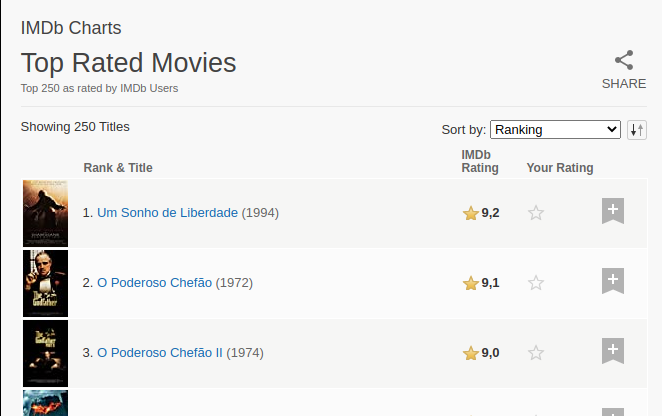

### **1.1. Arquivo Robots.txt**

Utilize o pacote Python `requests` para fazer o download do conteúdo do arquivo `robots.txt` do site do IMDB e salve numa variável chamada `robots`, este é o link:

```
https://www.imdb.com/robots.txt
```

Com o conteúdo na variável `robots`, verifique se a palavra `top` ou `charts` está presente no conteúdo do texto. Se sim, imprima `True`, senão imprima `False`.

In [2]:
# solução do exercício 1.1

import requests
import re
URL = 'https://www.imdb.com/robots.txt'

resposta = requests.get(URL)
robots = resposta.text

palavras_top = len(re.findall('top', robots, re.IGNORECASE))
palavras_charts = len(re.findall('charts', robots, re.IGNORECASE))

if palavras_top & palavras_charts == 0:
  print('False')
else:
  print('True')


False


**Dica**: Você pode colar o endereço do arquivo robots.txt no seu navegador para visualizar o conteúdo do arquivo.

### **1.2. Crawling & Scraping**

Utilize os pacotes Python `requests` e `beautifulsoup4` para extrair os 10 filmes mais populares do IMDB (titulo, ano e nota), este é o link:

```
https://www.imdb.com/chart/top/
```

Escreva os dados extraídos no arquivo csv `imdb.csv` separado por `;` no seguinte formato:

```
ranking;titulo;ano;nota
1;The Shawshank Redemption;1994;9.2
2;The Godfather;1972;9.1
3;The Godfather: Part II;1974;9.0
```

In [3]:
# a) Utilize o pacote requests para fazer o download da página na variável conteudo

import requests
from requests.exceptions import HTTPError

conteudo = None
URL = 'https://www.imdb.com/chart/top/'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'

        }
def crawl_website(url:str, headers:dict) -> str:
 try:
  resposta = requests.get(URL, headers=headers)
  resposta.raise_for_status()

 except HTTPError as exc:
  print(exc)
 else:
  return resposta.text

conteudo = crawl_website(url=URL,headers= headers)

print(conteudo)



<!DOCTYPE html><html lang="en-US" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1710868269370);
        }
    })</script><title>IMDb Top 250 Movies</title><meta name="description" content="As rated by regular IMDb voters." data-id="main"/><meta property="og:site_name" content="IMDb"/><meta property="og:title" content="IMDb Top 250 Movies"/><meta property="og:description" content="As rated b

In [4]:
# b) Utilize o pacote beautifulsoup4 para carregar o HTML da variavel conteudo na variavel pagina
from bs4 import BeautifulSoup

pagina = BeautifulSoup(conteudo, 'html.parser')

print(pagina)

<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1710868269370);
        }
    })</script><title>IMDb Top 250 Movies</title><meta content="As rated by regular IMDb voters." data-id="main" name="description"/><meta content="IMDb" property="og:site_name"/><meta content="IMDb Top 250 Movies" property="og:title"/><meta content="As rated by regular IMDb voters." p

In [5]:
# c) Utilize o código abaixo para iterar nas linhas e colunas da tabela e preencher a variavel conteudo_extraido
conteudo_extraido = []

tabela = pagina.find('div', {'data-testid':'chart-layout-main-column'})
filmes = tabela.find('ul')

for linha in filmes.find_all('li'):
    conteudo_extraido.append(linha.get_text(';').strip().split(';'))

for filme in conteudo_extraido[:10]:
    print(filme)




['1. The Shawshank Redemption', '1994', '2h 22m', 'R', '9.3', '\xa0(', '2.9M', ')', 'Rate']
['2. The Godfather', '1972', '2h 55m', 'R', '9.2', '\xa0(', '2M', ')', 'Rate']
['3. The Dark Knight', '2008', '2h 32m', 'PG-13', '9.0', '\xa0(', '2.9M', ')', 'Rate']
['4. The Godfather Part II', '1974', '3h 22m', 'R', '9.0', '\xa0(', '1.4M', ')', 'Rate']
['5. 12 Angry Men', '1957', '1h 36m', 'Approved', '9.0', '\xa0(', '859K', ')', 'Rate']
["6. Schindler's List", '1993', '3h 15m', 'R', '9.0', '\xa0(', '1.4M', ')', 'Rate']
['7. The Lord of the Rings: The Return of the King', '2003', '3h 21m', 'PG-13', '9.0', '\xa0(', '2M', ')', 'Rate']
['8. Pulp Fiction', '1994', '2h 34m', 'R', '8.9', '\xa0(', '2.2M', ')', 'Rate']
['9. The Lord of the Rings: The Fellowship of the Ring', '2001', '2h 58m', 'PG-13', '8.9', '\xa0(', '2M', ')', 'Rate']
['10. The Good, the Bad and the Ugly', '1966', '2h 58m', 'Approved', '8.8', '\xa0(', '807K', ')', 'Rate']


**Dica**: O código na letra c já extrai o conteúdo das linhas na lista `textos_coluna`, basta que você extraia o conteúdo de interesse dela. Como exemplo:

```python
[]
['', '1.', '      The Shawshank Redemption', '(1994)', '9.2', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
['', '2.', '      The Godfather', '(1972)', '9.1', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
['', '3.', '      The Godfather: Part II', '(1974)', '9.0', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
['', '4.', '      The Dark Knight', '(2008)', '9.0', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
['', '5.', '      12 Angry Men', '(1957)', '8.9', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
```

In [6]:
# d) Escreva o arquivo imdb.csv com o conteudo da variavel conteudo_extraido
import csv

# escrevendo o arquivo CSV
with open('imdb.csv', mode='w', newline='', encoding='utf8') as arquivo_csv:
   colunas= ['Título', 'Ano', 'Nota']
   escritor_csv = csv.writer(arquivo_csv)
   escritor_csv.writerow(colunas)
   for filme in conteudo_extraido:
      titulo = filme[0].strip()
      ano = filme[1].strip('()')
      nota = filme[4].strip ()
      escritor_csv.writerow([titulo, ano, nota])


---

## 2\. Bônus: Projeto em destaque do GitHub

**Nota**: Este exercício não é obrigatório.

O [GitHub](https://github.com/) é o maior repositória de código aberto na internet. Nele, você pode encontrar o código fonte de diversos projetos, alguns inclusive utilizamos em nossas aulas, como o [Pandas](https://github.com/pandas-dev/pandas). O GitHub apresenta uma página de projetos em destaque, que são os projetos que estão recebendo muita atenção da comunidade:

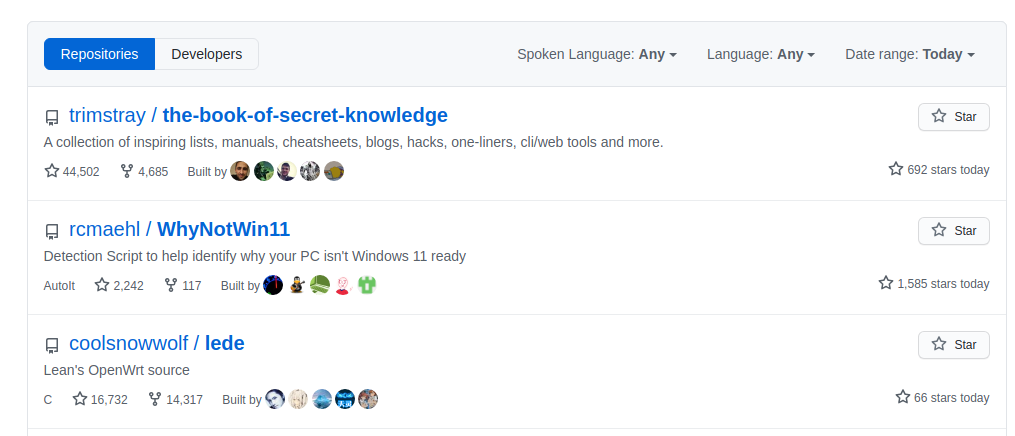

Utilize os pacotes Python `requests` e `beautifulsoup4` para extrair os 10 projetos mais populares do GitHub, este é o link:

```
https://github.com/trending
```

Escreva os dados extraídos no arquivo csv `github.csv` separado por `;` no seguinte formato:

```
ranking;project;language;stars;stars_today;forks
1;the-book-of-secret-knowledge;;44502;692;4685
2;whynotwin11;autoit;2242;1585;117
3;lede;c;16732;66;14317
```

**Nota**: Confira o arquivo `robots.txt` do website.

In [ ]:
# solução do exercício 2